# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
#Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Чтение файла (при первом чтении файла данные показывались как один столбец, добавили разделитель)
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#Просмотр первых 20 строк файла
display(data.head(20))
#Просмотр общей информации о файле
data.info()                                 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [2]:
#Поскольку видно не все колонки, применим метод set_option - pandas.set_option(pat, value)
#pat - display.max_columns, 
#value=22. Так как максимально по умолчанию показывается 20 колонок,а у нас их 22 
pd.set_option('display.max_columns', 22)
display(data.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
pd.set_option('float_format', '{:f}'.format)

Посмотрим на уникальные значения каждого столбца

In [4]:
data['total_images'].value_counts().sort_index(ascending=True)

0     1059
1      872
2      640
3      769
4      986
5     1301
6     1482
7     1521
8     1585
9     1725
10    1798
11    1362
12    1225
13    1015
14     986
15     948
16     761
17     650
18     642
19     603
20    1694
21      12
22       8
23      16
24       8
25       1
26       5
27       2
28       4
29       3
30       2
31       2
32       4
35       2
37       1
39       1
42       1
50       3
Name: total_images, dtype: int64

In [5]:
data['last_price'].value_counts().sort_index(ascending=True)

12190.000000        1
430000.000000       2
440000.000000       1
450000.000000       4
470000.000000       3
                   ..
300000000.000000    1
330000000.000000    1
401300000.000000    1
420000000.000000    1
763000000.000000    1
Name: last_price, Length: 2978, dtype: int64

In [6]:
data['total_area'].value_counts().sort_index(ascending=True)

12.000000     1
13.000000     3
13.200000     1
14.000000     1
15.000000     2
             ..
590.000000    1
618.000000    1
631.000000    1
631.200000    1
900.000000    1
Name: total_area, Length: 2182, dtype: int64

In [7]:
data['first_day_exposition'].value_counts().sort_index(ascending=True)

2014-11-27T00:00:00    19
2014-11-29T00:00:00     1
2014-12-04T00:00:00     2
2014-12-05T00:00:00     1
2014-12-08T00:00:00     8
                       ..
2019-04-29T00:00:00    37
2019-04-30T00:00:00    27
2019-05-01T00:00:00    30
2019-05-02T00:00:00    11
2019-05-03T00:00:00    20
Name: first_day_exposition, Length: 1491, dtype: int64

In [8]:
data['rooms'].value_counts().sort_index(ascending=True)

0      197
1     8047
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

In [9]:
data['ceiling_height'].value_counts().sort_index(ascending=True)

1.000000       1
1.200000       1
1.750000       1
2.000000      11
2.200000       1
              ..
26.000000      1
27.000000      8
27.500000      1
32.000000      2
100.000000     1
Name: ceiling_height, Length: 183, dtype: int64

In [10]:
data['floors_total'].value_counts().sort_index(ascending=True)

1.000000       25
2.000000      383
3.000000      668
4.000000     1200
5.000000     5788
6.000000      914
7.000000      592
8.000000      390
9.000000     3761
10.000000    1174
11.000000     203
12.000000    1362
13.000000     229
14.000000     553
15.000000     365
16.000000    1376
17.000000     833
18.000000     505
19.000000     339
20.000000     271
21.000000     158
22.000000     286
23.000000     352
24.000000     469
25.000000    1075
26.000000     124
27.000000     164
28.000000      21
29.000000       1
33.000000       1
34.000000       1
35.000000      24
36.000000       3
37.000000       1
52.000000       1
60.000000       1
Name: floors_total, dtype: int64

In [11]:
data['living_area'].value_counts().sort_index(ascending=True)

2.000000      2
3.000000      2
5.000000      1
5.400000      1
6.000000      1
             ..
322.300000    1
332.000000    1
347.500000    1
409.000000    1
409.700000    1
Name: living_area, Length: 1782, dtype: int64

In [12]:
data['floor'].value_counts().sort_index(ascending=True)

1     2917
2     3368
3     3073
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
11     523
12     526
13     379
14     337
15     343
16     315
17     227
18     178
19     147
20     110
21     125
22     113
23     100
24      63
25      46
26      24
27      10
28       1
29       1
30       1
31       1
32       1
33       1
Name: floor, dtype: int64

In [13]:
data['is_apartment'].value_counts().sort_index(ascending=True)

False    2725
True       50
Name: is_apartment, dtype: int64

In [14]:
data['studio'].value_counts().sort_index(ascending=True)

False    23550
True       149
Name: studio, dtype: int64

In [15]:
data['open_plan'].value_counts().sort_index(ascending=True)

False    23632
True        67
Name: open_plan, dtype: int64

In [16]:
data['kitchen_area'].value_counts().sort_index(ascending=True)

1.300000      1
2.000000      7
2.300000      1
2.400000      1
2.890000      1
             ..
93.200000     1
100.000000    1
100.700000    1
107.000000    1
112.000000    1
Name: kitchen_area, Length: 971, dtype: int64

In [17]:
data['balcony'].value_counts().sort_index(ascending=True)

0.000000    3758
1.000000    4195
2.000000    3659
3.000000      81
4.000000     183
5.000000     304
Name: balcony, dtype: int64

In [18]:
data['locality_name'].value_counts().sort_index(ascending=True)

Бокситогорск             16
Волосово                 36
Волхов                  111
Всеволожск              398
Выборг                  237
                       ... 
село Путилово             2
село Рождествено          3
село Русско-Высоцкое      9
село Старая Ладога        2
село Шум                  1
Name: locality_name, Length: 364, dtype: int64

In [19]:
data['airports_nearest'].value_counts().sort_index(ascending=True)

0.000000        1
6450.000000     2
6914.000000     1
6949.000000     1
6989.000000     6
               ..
83758.000000    1
84006.000000    1
84665.000000    1
84853.000000    1
84869.000000    1
Name: airports_nearest, Length: 8275, dtype: int64

In [20]:
data['cityCenters_nearest'].value_counts().sort_index(ascending=True)

181.000000      1
208.000000      1
215.000000      1
287.000000      1
291.000000      1
               ..
64857.000000    1
65105.000000    1
65764.000000    1
65952.000000    1
65968.000000    1
Name: cityCenters_nearest, Length: 7642, dtype: int64

In [21]:
data['parks_around3000'].value_counts().sort_index(ascending=True)

0.000000    10106
1.000000     5681
2.000000     1747
3.000000      647
Name: parks_around3000, dtype: int64

In [22]:
data['parks_nearest'].value_counts().sort_index(ascending=True)

1.000000       1
3.000000       1
4.000000       1
7.000000       1
9.000000       2
              ..
2905.000000    1
2984.000000    1
3013.000000    1
3064.000000    1
3190.000000    2
Name: parks_nearest, Length: 995, dtype: int64

In [23]:
data['ponds_around3000'].value_counts().sort_index(ascending=True)

0.000000    9071
1.000000    5717
2.000000    1892
3.000000    1501
Name: ponds_around3000, dtype: int64

In [24]:
data['ponds_nearest'].value_counts().sort_index(ascending=True)

13.000000      2
16.000000      8
19.000000      4
20.000000      5
22.000000      7
              ..
1299.000000    1
1313.000000    1
1337.000000    1
1341.000000    2
1344.000000    1
Name: ponds_nearest, Length: 1096, dtype: int64

In [25]:
data['days_exposition'].value_counts().sort_index(ascending=True)

1.000000         1
2.000000         3
3.000000       158
4.000000       176
5.000000       152
              ... 
1512.000000      2
1513.000000      1
1553.000000      1
1572.000000      1
1580.000000      1
Name: days_exposition, Length: 1141, dtype: int64

Приведем наименование столбца 'cityCenters_nearest' к принятому стандарту

In [26]:
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.000000,108.000000,2019-03-07T00:00:00,3,2.700000,16.000000,51.000000,8,NaN,False,False,25.000000,nan,Санкт-Петербург,18863.000000,16028.000000,1.000000,482.000000,2.000000,755.000000,nan
1,7,3350000.000000,40.400000,2018-12-04T00:00:00,1,nan,11.000000,18.600000,1,NaN,False,False,11.000000,2.000000,посёлок Шушары,12817.000000,18603.000000,0.000000,nan,0.000000,nan,81.000000
2,10,5196000.000000,56.000000,2015-08-20T00:00:00,2,nan,5.000000,34.300000,4,NaN,False,False,8.300000,0.000000,Санкт-Петербург,21741.000000,13933.000000,1.000000,90.000000,2.000000,574.000000,558.000000
3,0,64900000.000000,159.000000,2015-07-24T00:00:00,3,nan,14.000000,nan,9,NaN,False,False,nan,0.000000,Санкт-Петербург,28098.000000,6800.000000,2.000000,84.000000,3.000000,234.000000,424.000000
4,2,10000000.000000,100.000000,2018-06-19T00:00:00,2,3.030000,14.000000,32.000000,13,NaN,False,False,41.000000,nan,Санкт-Петербург,31856.000000,8098.000000,2.000000,112.000000,1.000000,48.000000,121.000000


### Вывод

Изучая таблицу можно заметить, что:
1. таблица содержит 22 колонки, из них 2 - bool (логического типа 0/1), 14 - float64 (числа с плавающей точкой), 3 - int64 (целочисленные значения), 3 - object ( текствые или смешанные значения)
    Исходя из здравого смысла, мы считаем. что необходимо преобразовать некоторые столбцу к другому типу:
- floors_total - к типу int64, так как количество этажей не может быть дробным числом
- is_apartment - к типу bool, так как информация дается в виде True/False (Да/Нет)
- balcony - к типу int64, так как число балконов не может быть дробным числом
- parks_around3000 - к типу int64, так как количество парков не может быть дробным числом
- ponds_around3000 - к типу int64, так как количество водоемов не может быть дробным числом
- days_exposition - к типу int64, так как количество дней не может быть дробным числом
2. Таблица состоит из 23699 строк (различных квартир). Во многих столбцах (14 из 22) существуют пропущенные значения. 
    В частности это столбцы:
- ceiling_height (высота потолков в м.), 
- floors_total (количество этажей в доме), 
- living_area (жилая площадь квартиры в кв.м.), 
- is_apartment (является квартира апартаментами или нет), 
- kitchen_area (площадь кухни в кв.м.), 
- balcony (количество балконов), 
- locality_name (наименование населенного пункта, в котором находится квартира), 
- airports_nearest (расстояние до ближайшего аэропорта в м.), 
- cityCenters_nearest (расстояние до центра города в м.), 
- parks_around3000 (количество парков в радиусе 3 км), 
- parks_nearest (расстояние до ближайшего парка в м), 
- ponds_around3000 (количество водоемов в радиусе 3 км), 
- ponds_nearest (расстояние до ближайшего водоема в м), 
- days_exposition (количество дней размещения объявления). 
    Остальные столбцы заполнены полностью
3. После переименования столбца cityCenters_nearest все наименования столбцов соответствуют правилам
4. При просмотре уникальных значений столбцов бросаются в глаза возможные выбросы, мы проверим данную гипотезу позже в пункте 4.3
<br>Данных для проверки достаточно, необходимо провести предобратку данных, то есть избавиться от дубликатов, пропусков, выбрать верный тип данных, категоризировать данные, и затем провести исследовательский анализ данных

## Предобработка данных

In [27]:
#посмотрим на количество пропусков в каждом столбце таблицы
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

* Как было указано выше в выводе пункта 1.1 в 14 из 22 столбцов содержат пропуски.
* Некоторые пропуски вероятнее всего появляются от того, что пользователи не обладают данной информацией, например, высота потолков (ceiling_height). Для заполнения данных видов пропусков необходимо дополнительное исследование
* Некоторые потому что пользователи считают, что если что-то в их квартире отсутствует, то и заполнять данный пункт не требуется, например, апартаменты (is_apartment) - это очень редко встречающийся тип квартир и вероятнее всего пользователи, зная, что их квартира не является апартаментами, просто пропускают данную колонку и оставляют ее пустой. Далее количество балконов (balcony), если значение пропущено, то вероятнее всего балкона в квартире нет. Заполним данные пропуски соответственно вышенаписанному, на нули.
* Есть очень важные пропуски, например, living_area (жилая площадь квартиры) и kitchen_area (площадь кухни), количество этажей в доме (floors_total), название населенного пункта (locality_name). Данные значения пропущены от невнимательности или лени пользователя, который не помнит данные и не желает искать данную информацию. Для заполнения данных видов пропусков необходимо дополнительное исследование
* Пропуски в пунктах airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition вероятнее всего произошли из-за какого-либо сбоя в выгрузке данных. Заполним пропуски только в столбце days_exposition, поскольку это важно для дальнейшего исследования. Остальные пропусти оставим как есть, заполнять их не будем.
* При условии если квартира студия, площадь кухни должна быть 0

Приступим к предобработке данных, во-первых, заполним пропуски в столбцах balcony и is_apartment, а после этого изменим тип данных, на int64 и bool, соответственно

In [28]:
#заполняем пропуски в столбце balcony на ноль
data['balcony'] = data['balcony'].fillna(0)
#заполняем пропуски в столбце is_apartment на ноль
data['is_apartment'] = data['is_apartment'].fillna(0)
#меняем тип данных в столбце balcony
data['balcony']=data['balcony'].astype('int64')
#меняем тип данных в столбце is_apartment
data['is_apartment']=data['is_apartment'].astype('bool')
#проверяем внесенные изменения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
city_centers_nearest    18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000  

Строки с пропусками названий населенных пунктов (locality_name), поскольку их очень мало (всего 49 из 23699) и при этом их невозможно восстановить, можно удалить

In [29]:
data.dropna(subset = ['locality_name'], inplace = True)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

В пункте 1. мы выяслили, что 197 квартир имеют количество комнат раное нулю. Проверим предположение, что эти квартиры относятся к студиям или квартирам со свободной планировкой

In [30]:
display(data.loc[data['rooms'] == 0, 'studio'])
display(data.loc[data['rooms'] == 0, 'open_plan'])
#Создадим сводную таблицу квартир с нулевым количеством комнат в соответствии с их типом (студия или свободная планировка)
data_pivot_rooms_zero = data.pivot_table(index=['rooms'], columns=['studio', 'open_plan'], values = 'days_exposition', aggfunc='count')
display(data_pivot_rooms_zero)

144       True
349      False
440       True
508      False
608       True
         ...  
23210     True
23442    False
23554     True
23592    False
23637     True
Name: studio, Length: 197, dtype: bool

144      False
349       True
440      False
508       True
608      False
         ...  
23210    False
23442     True
23554    False
23592     True
23637    False
Name: open_plan, Length: 197, dtype: bool

studio          False                True 
open_plan       False     True       False
rooms                                     
0                 nan 59.000000 124.000000
1         7248.000000  3.000000  11.000000
2         6896.000000  1.000000        nan
3         4801.000000  2.000000        nan
4          935.000000  1.000000        nan
5          251.000000  1.000000        nan
6           76.000000       nan        nan
7           37.000000       nan        nan
8           11.000000       nan        nan
9            4.000000       nan        nan
10           2.000000       nan        nan
11           1.000000       nan        nan
12           1.000000       nan        nan
14           2.000000       nan        nan
15           1.000000       nan        nan
16           1.000000       nan        nan
19           1.000000       nan        nan

Так как предположение подтвердилось, такие квартиры относятся либо к студиям, либо к свободной планировке, то оставим данные значения такими как есть. 

In [31]:
#Создадим столбец для определения находится ли квартира на последнем этаже
data['flat_on_the_last_floor'] = data['floors_total'] == data['floor']
data['flat_on_the_last_floor'].value_counts()

False    20295
True      3355
Name: flat_on_the_last_floor, dtype: int64

Строки с пропусками в этажности здания (floors_total) можно также удалить, их немного (85 шт). Но все же мы считаем, что в данном случае следует не удалять строки с пропущенными значениями, а заменить их на значение фактического этажа квартиры + 1, на котором находится квартира. Это вытекает из того, что далее для исследования нам понадобиться информация о том, на каком этаже находится квартира (категоризация идет на три категории: первый, последний этаж и другие), а вероятность того, что квартира находится на последнем этаже существенно меньше, чем на всех остальных.

In [32]:
#Заменим пропущенные значения в столбце floors_total на ноль
data['floors_total'] = data['floors_total'].fillna(0)
#Заменим значения на значения столбца floor + 1, при условии, что в столбце floors_total ноль
data['floors_total'] = np.where(data['floors_total'] == 0, data['floor'] + 1, data['floors_total'])
#меняем тип данных в столбце balcony
data['floors_total']=data['floors_total'].astype('int64')
#Проверим информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
total_images              23650 non-null int64
last_price                23650 non-null float64
total_area                23650 non-null float64
first_day_exposition      23650 non-null object
rooms                     23650 non-null int64
ceiling_height            14490 non-null float64
floors_total              23650 non-null int64
living_area               21752 non-null float64
floor                     23650 non-null int64
is_apartment              23650 non-null bool
studio                    23650 non-null bool
open_plan                 23650 non-null bool
kitchen_area              21381 non-null float64
balcony                   23650 non-null int64
locality_name             23650 non-null object
airports_nearest          18116 non-null float64
city_centers_nearest      18139 non-null float64
parks_around3000          18140 non-null float64
parks_nearest             8064

* Далее будем заменять пропущенные значения в столбцах living_area и kitchen_area
* Для начала для всех строк, в которых значится, что квартира-студия (значение True), заменим площадь кухни на ноль
* Остальные пропуски в двух данных столбцах заменим на медианные значения по выборке

In [33]:
#Заменим значения площади кухни студии на ноль
data['kitchen_area'] = np.where(data['studio'] == True, 0, data['kitchen_area'])
#Остальные пропущенные значения заменим на медианное значение
data['living_area'] = data['living_area'].fillna(data['living_area'].median())
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
total_images              23650 non-null int64
last_price                23650 non-null float64
total_area                23650 non-null float64
first_day_exposition      23650 non-null object
rooms                     23650 non-null int64
ceiling_height            14490 non-null float64
floors_total              23650 non-null int64
living_area               23650 non-null float64
floor                     23650 non-null int64
is_apartment              23650 non-null bool
studio                    23650 non-null bool
open_plan                 23650 non-null bool
kitchen_area              23650 non-null float64
balcony                   23650 non-null int64
locality_name             23650 non-null object
airports_nearest          18116 non-null float64
city_centers_nearest      18139 non-null float64
parks_around3000          18140 non-null float64
parks_nearest             8064

Посмотрим на медианное и среднее начение высоты потолка

In [34]:
print(data['ceiling_height'].median(), ';', data['ceiling_height'].mean())

2.65 ; 2.7712870945479646


Так как данные значения близки к друг другу и к реальных цифрам, то заменим пропуски в столбце ceiling_height на медианное значение

In [35]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
total_images              23650 non-null int64
last_price                23650 non-null float64
total_area                23650 non-null float64
first_day_exposition      23650 non-null object
rooms                     23650 non-null int64
ceiling_height            23650 non-null float64
floors_total              23650 non-null int64
living_area               23650 non-null float64
floor                     23650 non-null int64
is_apartment              23650 non-null bool
studio                    23650 non-null bool
open_plan                 23650 non-null bool
kitchen_area              23650 non-null float64
balcony                   23650 non-null int64
locality_name             23650 non-null object
airports_nearest          18116 non-null float64
city_centers_nearest      18139 non-null float64
parks_around3000          18140 non-null float64
parks_nearest             8064

Начнем разбираться с пропусками с столбце с днями экспозиции объявления (days_exposition)

In [36]:
data[data['days_exposition'].isnull()].pivot_table(columns = 'first_day_exposition', values = 'total_area', aggfunc = 'count')

first_day_exposition,2014-11-27T00:00:00,2014-12-08T00:00:00,2014-12-09T00:00:00,2014-12-10T00:00:00,2014-12-11T00:00:00,2014-12-12T00:00:00,2014-12-27T00:00:00,2015-01-03T00:00:00,2015-01-15T00:00:00,2015-01-20T00:00:00,2015-01-21T00:00:00,...,2019-04-23T00:00:00,2019-04-24T00:00:00,2019-04-25T00:00:00,2019-04-26T00:00:00,2019-04-27T00:00:00,2019-04-28T00:00:00,2019-04-29T00:00:00,2019-04-30T00:00:00,2019-05-01T00:00:00,2019-05-02T00:00:00,2019-05-03T00:00:00
total_area,3,1,7,3,2,1,1,1,1,1,6,...,30,32,26,35,14,18,36,25,29,11,20


In [38]:
#Посмотрим на медианное и среднее начение дней экспозиции
print(data['days_exposition'].median(), ';', data['days_exposition'].mean())

95.0 ; 180.7531998045921


Поскольку разница между значением медианы и среднего очень велика, практически в два раза, и при этом гипотеза об прямой зависимости роста числа объявлений с пустым признаком days_exposition от срока, в течение которого размещено объявление, подтверждается, мы принимаем решение не заполнять пропуски в данном столбце

Тип значений в столбцах days_exposition, parks_around3000, ponds_around3000 менять не будем, так как мы там оставили пропущенные значения, которые не стали заменять информацией, которую не возможно найти

Проверим уникальные значения в столбце locality_name

In [39]:
data['locality_name'].value_counts().head(50)

Санкт-Петербург                            15721
посёлок Мурино                               522
посёлок Шушары                               440
Всеволожск                                   398
Пушкин                                       369
Колпино                                      338
посёлок Парголово                            327
Гатчина                                      307
деревня Кудрово                              299
Выборг                                       237
Петергоф                                     201
Сестрорецк                                   183
Красное Село                                 178
Кудрово                                      173
деревня Новое Девяткино                      144
Сертолово                                    142
Ломоносов                                    133
Кириши                                       125
Сланцы                                       112
Волхов                                       111
Тосно               

Проверим таблицу на явные дубликаты

In [40]:
data.duplicated().sum()

0

В названиях населенных пунктов бросается в глаза разное написание пунктов Мурино и Кудрово, приведем к единому виду

In [41]:
def rename(row):
    if row == 'Мурино' or row == 'посёлок Мурино':
        return 'поселок Мурино'
    if row == 'Кудрово':
        return 'деревня Кудрово'
    return row

In [42]:
data['locality_name'] = data['locality_name'].apply(rename)
data['locality_name'].value_counts().head(5)

Санкт-Петербург    15721
поселок Мурино       590
деревня Кудрово      472
посёлок Шушары       440
Всеволожск           398
Name: locality_name, dtype: int64

Также заменим все буквы 'ё' на 'е'

In [43]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'].value_counts().head(5)

Санкт-Петербург    15721
поселок Мурино       590
деревня Кудрово      472
поселок Шушары       440
Всеволожск           398
Name: locality_name, dtype: int64

Переведем стоимость квартиры в тыс. руб.

In [121]:
data['last_price'] = data['last_price'] / 1000

### Вывод

Проверили предобработку данных, заполнили важные пропуски, удалили данные, которые невозможно установить, но они играют роль для дальнейшего исследования. Заменили некоторые типы данных на более подходящие. Проверили названия населенных пунктов на дубликаты. Датасет готов для дальнейшей работы

## Расчёты и добавление результатов в таблицу

### Cтолбец c ценой квадратного метра
Рассчитаем новый столбец price_sq_m, в который занесем цену квадратного метра 
Рассчитанное значение округлим до двух знаков после запятой.

In [45]:
data['price_sq_m'] = data['last_price'] / data['total_area']
data['price_sq_m'] = data['price_sq_m'].astype('float64').round(2)
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,flat_on_the_last_floor,price_sq_m
0,20,13000.000000,108.000000,2019-03-07T00:00:00,3,2.700000,16,51.000000,8,False,False,...,0,Санкт-Петербург,18863.000000,16028.000000,1.000000,482.000000,2.000000,755.000000,nan,False,120.370000
1,7,3350.000000,40.400000,2018-12-04T00:00:00,1,2.650000,11,18.600000,1,False,False,...,2,поселок Шушары,12817.000000,18603.000000,0.000000,nan,0.000000,nan,81.000000,False,82.920000
2,10,5196.000000,56.000000,2015-08-20T00:00:00,2,2.650000,5,34.300000,4,False,False,...,0,Санкт-Петербург,21741.000000,13933.000000,1.000000,90.000000,2.000000,574.000000,558.000000,False,92.790000
3,0,64900.000000,159.000000,2015-07-24T00:00:00,3,2.650000,14,30.000000,9,False,False,...,0,Санкт-Петербург,28098.000000,6800.000000,2.000000,84.000000,3.000000,234.000000,424.000000,False,408.180000
4,2,10000.000000,100.000000,2018-06-19T00:00:00,2,3.030000,14,32.000000,13,False,False,...,0,Санкт-Петербург,31856.000000,8098.000000,2.000000,112.000000,1.000000,48.000000,121.000000,False,100.000000


### Столбцы день недели, месяц и год публикации объявления
Поскольку нам не важно время добавления объявления, оно во всех вариантах встает как 00:00,то можно округлить данный столбец до даты
Затем добавим в таблицу день недели, месяц и год публикации объявления

In [46]:
#Переведем столбец в формат даты и округлим
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y.%m.%dT%H:%M:%S')
data['first_day_exposition'] = data['first_day_exposition'].dt.round('1D')
#День недели
data['week_day'] = data['first_day_exposition'].dt.weekday
#Месяц
data['month'] = data['first_day_exposition'].dt.month
#Год
data['year'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,flat_on_the_last_floor,price_sq_m,week_day,month,year
0,20,13000.000000,108.000000,2019-03-07,3,2.700000,16,51.000000,8,False,False,...,16028.000000,1.000000,482.000000,2.000000,755.000000,nan,False,120.370000,3,3,2019
1,7,3350.000000,40.400000,2018-12-04,1,2.650000,11,18.600000,1,False,False,...,18603.000000,0.000000,nan,0.000000,nan,81.000000,False,82.920000,1,12,2018
2,10,5196.000000,56.000000,2015-08-20,2,2.650000,5,34.300000,4,False,False,...,13933.000000,1.000000,90.000000,2.000000,574.000000,558.000000,False,92.790000,3,8,2015
3,0,64900.000000,159.000000,2015-07-24,3,2.650000,14,30.000000,9,False,False,...,6800.000000,2.000000,84.000000,3.000000,234.000000,424.000000,False,408.180000,4,7,2015
4,2,10000.000000,100.000000,2018-06-19,2,3.030000,14,32.000000,13,False,False,...,8098.000000,2.000000,112.000000,1.000000,48.000000,121.000000,False,100.000000,1,6,2018


### Столбец этаж квартиры
Все многообразие различных этажей на которых находятся продаваемые квартиры сгруппируем в три группы: первый этаж, последний этаж и другой. Поскольку чаще всего первые и последние этажи удешевляют стоимость квартиры

In [47]:
def whats_the_floor(row):
    floor_flat = row['floor']
    total_floor = row['floors_total']
    if floor_flat == 1:
        return 'Первый этаж'
    if floor_flat == total_floor:
        return 'Последний этаж'
    return 'Другой этаж'

In [48]:
data['floor_group'] = data.apply(whats_the_floor, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,flat_on_the_last_floor,price_sq_m,week_day,month,year,floor_group
0,20,13000.000000,108.000000,2019-03-07,3,2.700000,16,51.000000,8,False,False,...,1.000000,482.000000,2.000000,755.000000,nan,False,120.370000,3,3,2019,Другой этаж
1,7,3350.000000,40.400000,2018-12-04,1,2.650000,11,18.600000,1,False,False,...,0.000000,nan,0.000000,nan,81.000000,False,82.920000,1,12,2018,Первый этаж
2,10,5196.000000,56.000000,2015-08-20,2,2.650000,5,34.300000,4,False,False,...,1.000000,90.000000,2.000000,574.000000,558.000000,False,92.790000,3,8,2015,Другой этаж
3,0,64900.000000,159.000000,2015-07-24,3,2.650000,14,30.000000,9,False,False,...,2.000000,84.000000,3.000000,234.000000,424.000000,False,408.180000,4,7,2015,Другой этаж
4,2,10000.000000,100.000000,2018-06-19,2,3.030000,14,32.000000,13,False,False,...,2.000000,112.000000,1.000000,48.000000,121.000000,False,100.000000,1,6,2018,Другой этаж


### Столбцы с соотношением жилой и общей площади, а также отношением площади кухни к общей
Добавим столбец с соотношением жилой и общей площади, а также отношением площади кухни к общей. Оставим три цифры после запятой, поскольку мы считаем доли от целого

In [49]:
data['living_to_total'] = data['living_area'] / data['total_area']
data['kitchen_to_total'] = data['kitchen_area'] / data['total_area']
data['living_to_total'] = data['living_to_total'].round(3)
data['kitchen_to_total'] = data['kitchen_to_total'].round(3)
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,flat_on_the_last_floor,price_sq_m,week_day,month,year,floor_group,living_to_total,kitchen_to_total
0,20,13000.000000,108.000000,2019-03-07,3,2.700000,16,51.000000,8,False,False,...,2.000000,755.000000,nan,False,120.370000,3,3,2019,Другой этаж,0.472000,0.231000
1,7,3350.000000,40.400000,2018-12-04,1,2.650000,11,18.600000,1,False,False,...,0.000000,nan,81.000000,False,82.920000,1,12,2018,Первый этаж,0.460000,0.272000
2,10,5196.000000,56.000000,2015-08-20,2,2.650000,5,34.300000,4,False,False,...,2.000000,574.000000,558.000000,False,92.790000,3,8,2015,Другой этаж,0.612000,0.148000
3,0,64900.000000,159.000000,2015-07-24,3,2.650000,14,30.000000,9,False,False,...,3.000000,234.000000,424.000000,False,408.180000,4,7,2015,Другой этаж,0.189000,0.057000
4,2,10000.000000,100.000000,2018-06-19,2,3.030000,14,32.000000,13,False,False,...,1.000000,48.000000,121.000000,False,100.000000,1,6,2018,Другой этаж,0.320000,0.410000
5,10,2890.000000,30.400000,2018-09-10,1,2.650000,12,14.400000,5,False,False,...,nan,nan,55.000000,False,95.070000,0,9,2018,Другой этаж,0.474000,0.299000
6,6,3700.000000,37.300000,2017-11-02,1,2.650000,26,10.600000,6,False,False,...,0.000000,nan,155.000000,False,99.200000,3,11,2017,Другой этаж,0.284000,0.386000
7,5,7915.000000,71.600000,2019-04-18,2,2.650000,24,30.000000,22,False,False,...,0.000000,nan,nan,False,110.540000,3,4,2019,Другой этаж,0.419000,0.264000
8,20,2900.000000,33.160000,2018-05-23,1,2.650000,27,15.430000,26,False,False,...,nan,nan,189.000000,False,87.450000,2,5,2018,Другой этаж,0.465000,0.266000
9,18,5400.000000,61.000000,2017-02-26,3,2.500000,9,43.600000,7,False,False,...,0.000000,nan,289.000000,False,88.520000,6,2,2017,Другой этаж,0.715000,0.107000


### Вывод 

В данной главе мы рассчитали требуемые для анализа дополнительные данные

## Исследовательский анализ данных

### Изучение параметров: площадь, цена, число комнат, высота потолков

#### Изучим параметр: общая площадь квартиры

In [50]:
data['total_area'].describe()

count   23650.000000
mean       60.329069
std        35.661808
min        12.000000
25%        40.000000
50%        52.000000
75%        69.700000
max       900.000000
Name: total_area, dtype: float64

Всего изучено 23650 вариантов квартир с площадью от 12 кв.м. до 900 кв.м. В среднем площадь квартиры составляет 60,33 кв. м. Медиана - 52 кв.м. Медиана меньше среднего значения в связи с тем, что есть очень редкие варианты квартир с очень большой площадью. 

Построим гистограмму показателя общая площадь квартиры, для начала возьмем весь размах вариации

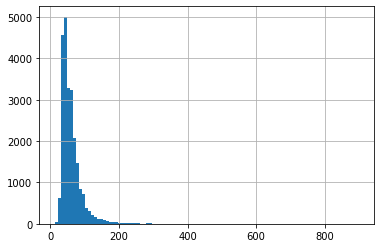

In [51]:
data['total_area'].hist(bins=100,range=(12,900))

Данная гистограмма плохо воспринимается визуально, примем размах вариации до 75%, то есть от 12 до 70 кв.м.

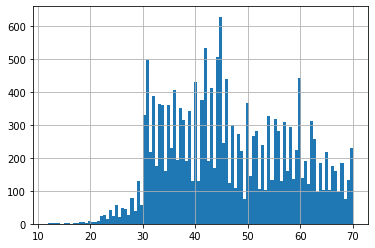

In [52]:
data['total_area'].hist(bins=100,range=(12,70))

Большинство квартир имеют площадь от 20 до 70 кв.м.

#### Изучим параметр: цена квартиры

In [53]:
data['last_price'].describe()

count    23650.000000
mean      6541.126898
std      10896.399175
min         12.190000
25%       3400.000000
50%       4650.000000
75%       6799.000000
max     763000.000000
Name: last_price, dtype: float64

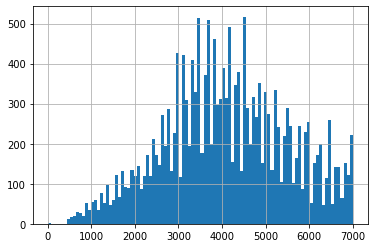

In [54]:
data['last_price'].hist(bins=100,range=(10,7000))

Всего изучено 23650 вариантов квартир с ценой от 12,19 до 763000 тыс. руб. В среднем цена квартиры составляет 6541,13 тыс. р. Медиана - 4650 тыс.р. Медиана меньше среднего значения в связи с тем, что есть очень редкие варианты квартир с очень высокой ценой.

#### Изучим параметр: число комнат

In [55]:
data['rooms'].describe()

count   23650.000000
mean        2.070106
std         1.078620
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

Построим гистограмму с малым числом корзин, так как число комнат обладает небольшим разбросом, от 0 до 19 комнат

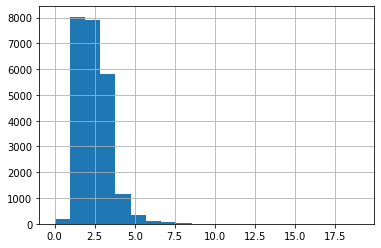

In [56]:
data['rooms'].hist(bins=20,range=(0,19))

Всего изучено 23650 вариантов квартир с количеством комнат от 0 до 19. В среднем количество комнат составляет 2,07 комнаты. Медиана - 2 комнаты.

#### Изучим параметр: высота потолков

In [57]:
data['ceiling_height'].describe()

count   23650.000000
mean        2.724311
std         0.989255
min         1.000000
25%         2.600000
50%         2.650000
75%         2.700000
max       100.000000
Name: ceiling_height, dtype: float64

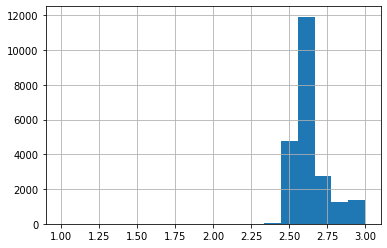

In [58]:
data['ceiling_height'].hist(bins=18,range=(1,3))

Всего изучено 23650 вариантов квартир с высотой потолков от 1 до 100 м. В среднем высота потолков составляет 2,72 м. Медиана - 2,65 м.

### Изучите время продажи квартиры

In [59]:
#Посмотрим общую инфоомацию о столбце
data['days_exposition'].describe()

count   20470.000000
mean      180.753200
std       219.777916
min         1.000000
25%        45.000000
50%        95.000000
75%       231.000000
max      1580.000000
Name: days_exposition, dtype: float64

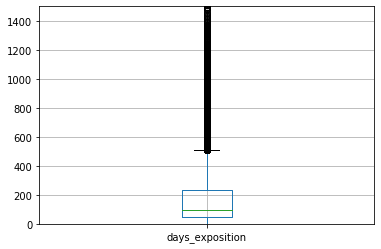

In [60]:
#Построим ящик с усами для оценки выбивающихся значений
plt.ylim(0,1500)
data.boxplot(column='days_exposition') 
plt.show()

* «Усы» простираются влево и вправо от границ ящика на расстояние, равное
1,5 межквартильным размахам. В размах «усов» попадают нормальные
значения, а за пределами находятся выбросы, изображённые точками.
* Уберем значения более 430 дней: 198+(198-45)*1,5 = 427,5

In [61]:
data_current_days_exposition = data.query('days_exposition < 430')
data_current_days_exposition['days_exposition'].describe()

count   18144.000000
mean      116.251929
std       104.557477
min         1.000000
25%        39.000000
50%        80.000000
75%       168.000000
max       429.000000
Name: days_exposition, dtype: float64

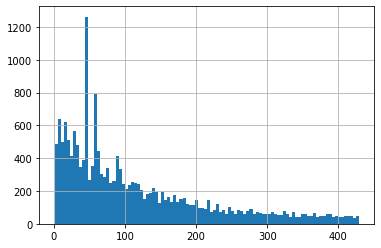

In [62]:
#Построим гистограмму
data_current_days_exposition['days_exposition'].hist(bins=100)

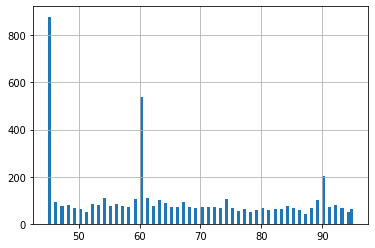

In [63]:
#Построим уточненную гистограмму
data_current_days_exposition['days_exposition'].hist(bins=100, range=(45,95))

* Самая быстрая продажа заняла 1 день.
* Самая долгая продажа после удаления выбросов - 429 дней 
* Продажи, проведенные быстрее чем 45 дней можно считать быстрыми, а более 146 дней - необычно долгими. 
* В среднем продажа квартиры занимает 113 дней. Более 50% значений от всех продаж происходят до истечения 95 дней.
* Модальное значение (наиболее часто встречающееся значение) составляет 95 дней, также часто встречаются значения 45, 60 и 90 дней, то есть 1,5, 2 и 3 месяца. Возможно это связано с бесплатной рекламой, либо какими-либо промоакциями, который провоцируют увеличение количества просмотром и, соответственно, улучшают продажи.

### Уберем редкие и выбивающиеся значения

1. В пункте 1 мы просмотрели все уникальные значения столбцов, три из них вызывают сомнения в реальности данных.
- столбец цена квартиры last_price
- столбец с общей площадью квартиры total_area
- столбец с высотой потолков ceiling_height
2. Столбец с временем продажи квартиры days_exposition обработан и очишен от выбросов в пункте 4.2.
3. При помощи построения ящика с усами определим выбросы и удалим их

#### Цена квартиры

In [64]:
data['last_price'].describe()

count    23650.000000
mean      6541.126898
std      10896.399175
min         12.190000
25%       3400.000000
50%       4650.000000
75%       6799.000000
max     763000.000000
Name: last_price, dtype: float64

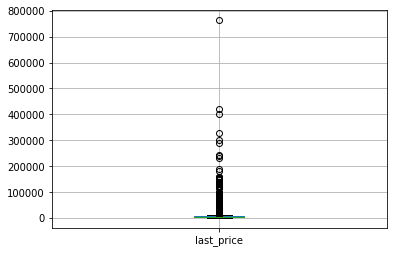

In [65]:
#Построим ящик с усами для оценки выбивающихся значений
data.boxplot(column='last_price') 
plt.show()

In [66]:
Q1_last_price = data['last_price'].quantile(0.25)
Q3_last_price = data['last_price'].quantile(0.75)
IQR_last_price = Q3_last_price + (Q3_last_price - Q1_last_price)*1.5
print(IQR_last_price)

11897.5


Уберем значения более 11897.5 тыс. руб.: 6799+(6799-3400)*1,5

In [67]:
data_current_last_price = data.query('last_price < 11897.5')
data_current_last_price['last_price'].describe()

count   21595.000000
mean     4838.942091
std      2217.282225
min        12.190000
25%      3300.000000
50%      4400.000000
75%      6000.000000
max     11894.400000
Name: last_price, dtype: float64

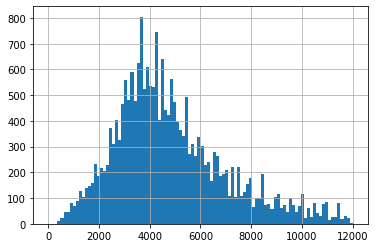

In [68]:
data_current_last_price['last_price'].hist(bins=100, range=(0,12000))

Исходя из гистограммы видно, что цены на квартиры подчиняются нормальному закону. Что в целом подтверждает, верность исследования

#### Площадь квартиры

In [69]:
data['total_area'].describe()

count   23650.000000
mean       60.329069
std        35.661808
min        12.000000
25%        40.000000
50%        52.000000
75%        69.700000
max       900.000000
Name: total_area, dtype: float64

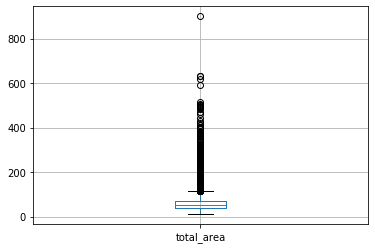

In [70]:
data.boxplot(column='total_area') 
plt.show()

In [122]:
Q1_total_area = data['total_area'].quantile(0.25)
Q3_total_area = data['total_area'].quantile(0.75)
IQR_total_area = Q3_total_area + (Q3_total_area - Q1_total_area)*1.5
print(IQR_total_area)

114.25


In [72]:
data_current_total_area = data.query('total_area < 114.25')
data_current_total_area['total_area'].describe()

count   22406.000000
mean       54.325685
std        19.349559
min        12.000000
25%        39.400000
50%        50.100000
75%        65.500000
max       114.200000
Name: total_area, dtype: float64

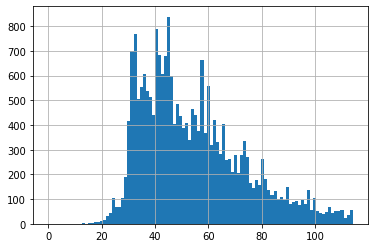

In [73]:
data_current_total_area['total_area'].hist(bins=100, range=(0,114))

Исходя из гистограммы видно, что общая площадь квартир подчиняется нормальному закону. Что в целом подтверждает, верность исследования

#### Высота потолков

In [74]:
data['ceiling_height'].describe()

count   23650.000000
mean        2.724311
std         0.989255
min         1.000000
25%         2.600000
50%         2.650000
75%         2.700000
max       100.000000
Name: ceiling_height, dtype: float64

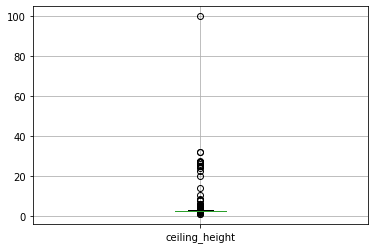

In [75]:
data.boxplot(column='ceiling_height') 
plt.show()

In [126]:
Q1_ceiling_height = data['ceiling_height'].quantile(0.25)
Q3_ceiling_height = data['ceiling_height'].quantile(0.75)
IQR_ceiling_height_plus = Q3_ceiling_height + (Q3_ceiling_height - Q1_ceiling_height)*1.5
IQR_ceiling_height_minus = Q1_ceiling_height - (Q3_ceiling_height - Q1_ceiling_height)*1.5
print(IQR_ceiling_height_plus, IQR_ceiling_height_minus)

2.8500000000000005 2.45


In [127]:
data_current_ceiling_height = data.query('2.45 < ceiling_height < 4.3')
data_current_ceiling_height['ceiling_height'].describe()

count   23535.000000
mean        2.695332
std         0.208023
min         2.460000
25%         2.600000
50%         2.650000
75%         2.700000
max         4.250000
Name: ceiling_height, dtype: float64

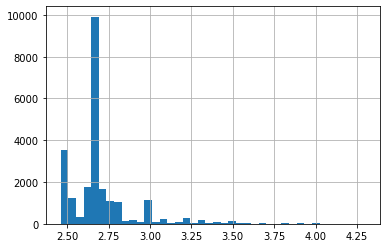

In [131]:
data_current_ceiling_height['ceiling_height'].hist(bins=40, range=(2.46,4.3))

Посмотрим более подробно на кусок гистограммы в диапазоне от 2,65 до 2,75 м.

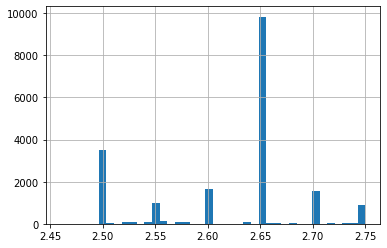

In [132]:
data_current_ceiling_height['ceiling_height'].hist(bins=40, range=(2.46,2.75))

Типовая высота потолков приблизительно 2,5 или 2,65 м.

Создадим новый датафрейм, в который включим данные, удовлетворяющие нашим условиям

In [134]:
data_good = data[
    (data['days_exposition'] <= 430) &
    (data['last_price'] <= 11897.5) & 
    (data['total_area'] <= 114.25) & 
    (data['ceiling_height'] >= 2.45) &
    (data['ceiling_height'] <= 4.3)
]
data_good.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17386 entries, 1 to 23695
Data columns (total 30 columns):
total_images              17386 non-null int64
last_price                17386 non-null float64
total_area                17386 non-null float64
first_day_exposition      17386 non-null datetime64[ns]
rooms                     17386 non-null int64
ceiling_height            17386 non-null float64
floors_total              17386 non-null int64
living_area               17386 non-null float64
floor                     17386 non-null int64
is_apartment              17386 non-null bool
studio                    17386 non-null bool
open_plan                 17386 non-null bool
kitchen_area              17386 non-null float64
balcony                   17386 non-null int64
locality_name             17386 non-null object
airports_nearest          13267 non-null float64
city_centers_nearest      13284 non-null float64
parks_around3000          13284 non-null float64
parks_nearest         

После удаления редких и выбивающихся значений осталось 17386 варианта квартир.
В столбцах airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest остались пропуски, которые невозможно заполнить. Оставим их без изменений

### Какие факторы больше всего влияют на стоимость квартиры

Изучим зависимость цены от площади, числа комнат и удалённости от центра.

#### Зависимость цены от площади

In [80]:
#Рачет коэффициента корреляции
data_good['last_price'].corr(data_good['total_area'])

0.6865833578451734

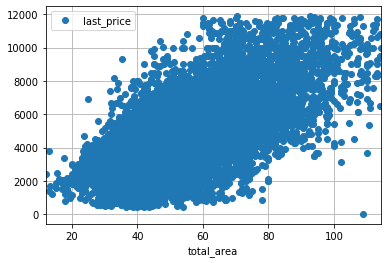

In [81]:
#Построение графика зависимости
(data_good
    .sort_values(by='total_area',ascending=True)
    .plot(x='total_area',y='last_price',grid=True, style='o')
)

Исходя из значения коэффициента корреляции, можно сделать вывод о том, что так как он лежит в интервале от 0.5 до 0.7 и он больше нуля, то зависимость цены квартиры от общей площади средняя и положительная. То есть при увеличении общей площади квартиры в среднем цена за квартиру также растет.
График доказывает наше утверждение. Существуют исключения, но их немного

#### Зависимость цены от количества комнат

In [82]:
data_good['last_price'].corr(data_good['rooms'])

0.42155241867699333

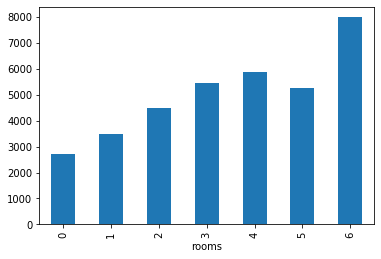

In [83]:
#Построение графика зависимости
(data_good
    .groupby('rooms')['last_price'].median()
    .plot(x='rooms',y='last_price',kind='bar')
)

* Исходя из значения коэффициента корреляции, можно сделать вывод о том, что так как он лежит в интервале от 0.3 до 0.5 и он больше нуля, то зависимость цены квартиры и количеством комнат ниже средней и положительная. То есть при увеличении количества комнат в среднем цена за квартиру также растет.
* То есть количество комнат конечно влияет на цену, но не так сильно как площадь квартиры

#### Зависимость цены от удаленности от центра города 

In [84]:
data_good['last_price'].corr(data_good['city_centers_nearest'])

-0.30513777968711925

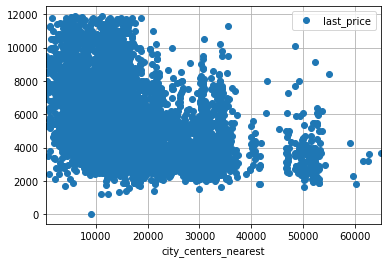

In [85]:
#Построение графика зависимости
(data_good
    .sort_values(by='city_centers_nearest',ascending=True)
    .plot(x='city_centers_nearest',y='last_price',grid=True, style='o')
)

* Исходя из значения коэффициента корреляции, можно сделать вывод о том, что так как
он лежит в интервале от 0 до 0.3 и он ниже нуля, то зависимость цены квартиры 
и расстояние до центра города ниже средней и отрицательная. 
То есть при увеличении расстояния до центра города в среднем цена за квартиру падает.
* Расстояние до центра влияет на цену, но не так сильно как площадь квартиры
* Судя по диаграмме рассеяния очень дорогие квартиры близко к центру и примерно на 30 км от центра города 
(видимо в дорогих коттеджных поселках, вдали от народа и смога)

#### Зависимость цены от этажа, на котором расположена квартира

In [86]:
#Присвоим категории Первый этаж значение 0, последний - 1, другие - 2
data_good['floor_group_id'] = data_good['floor_group'].map(
    {'Первый этаж': 0, 'Последний этаж': 1, 'Другой этаж': 2})
data_good['last_price'].corr(data_good['floor_group_id'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0.17869226571566027

Исходя из значения коэффициента корреляции, можно сделать вывод о том, что так как он лежит в интервале от 0 до 0.3 и он больше нуля, то зависимость цены квартиры и этажа, на котором она находится ниже средней и положительная. То есть группа другие этажи (не первый и не последний) имеет большую цену за квартиру.

Построим гистограмму, которая покажет отношение цены объекта и этажной группы (первый, последний, другой)

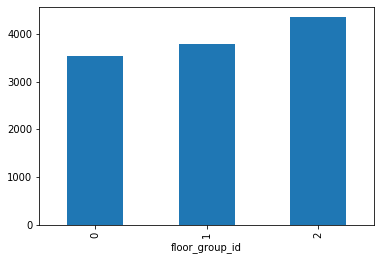

In [87]:
(data_good
    .groupby('floor_group_id')['last_price'].median()
    .plot(x='floor_group_id',y='last_price',kind='bar')
)

Гистограмма подтверждает надо предположение о том, что первый этаж удешевляет цену на квартиру практически также как и последний, в отличии от других этажей

#### Зависимость цены на квартиру от дня недели, месяца и года

In [88]:
data_good['last_price'].corr(data_good['week_day'])

-0.0016857289495957677

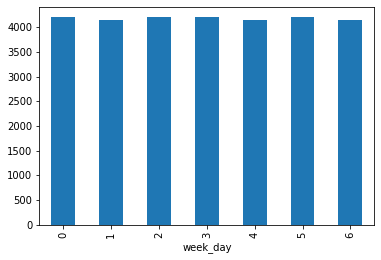

In [89]:
(data_good
    .groupby('week_day')['last_price'].median()
    .plot(x='week_day',y='last_price',kind='bar')
)

Зависимость цены от дня недели отсутствует

In [90]:
data_good['last_price'].corr(data_good['month'])

0.010132697850381338

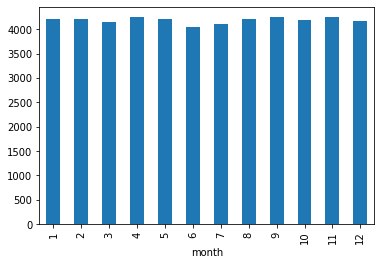

In [91]:
(data_good
    .groupby('month')['last_price'].median()
    .plot(x='month',y='last_price',kind='bar')
)

Небольшой пик увеличения цены происходит в апреле, небольшой спад в июне. Вероятно это связано с летним сезоном, когда все разьезжаются по отпускам и продаже перед летом возрастают, что провоцирует подьем цены, а летом приостанавливаются, что в свою очередь снижает цену

In [92]:
data_good['last_price'].corr(data_good['year'])

0.007928552104076003

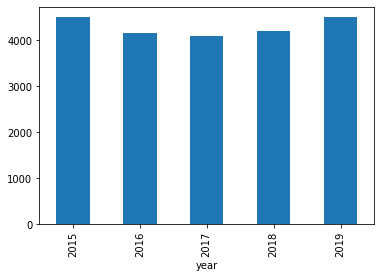

In [93]:
(data_good
    .groupby('year')['last_price'].median()
    .plot(x='year',y='last_price',kind='bar')
)

в 2014 году стоимость квартир была значительно выше, потом произошел обвал цен.

Построим корреляционную таблицу для всех рассмотренных показателей

In [94]:
data_good[[
    'last_price', 'total_area', 'rooms', 
    'city_centers_nearest', 'floor_group_id',
    'week_day', 'month', 'year'
]].corr()

,last_price,total_area,rooms,city_centers_nearest,floor_group_id,week_day,month,year
last_price,1.000000,0.686583,0.421552,-0.305138,0.178692,-0.001686,0.010133,0.007929
total_area,0.686583,1.000000,0.801823,-0.071602,0.016483,-0.000440,0.005190,-0.063777
rooms,0.421552,0.801823,1.000000,-0.032123,-0.082596,0.000317,-0.002633,-0.049342
city_centers_nearest,-0.305138,-0.071602,-0.032123,1.000000,-0.071204,-0.001156,-0.014317,0.007502
floor_group_id,0.178692,0.016483,-0.082596,-0.071204,1.000000,-0.005921,0.014609,0.022413
week_day,-0.001686,-0.000440,0.000317,-0.001156,-0.005921,1.000000,0.011435,-0.003835
month,0.010133,0.005190,-0.002633,-0.014317,0.014609,0.011435,1.000000,-0.234823
year,0.007929,-0.063777,-0.049342,0.007502,0.022413,-0.003835,-0.234823,1.000000


Между показателями rooms (количество комнат) и total_area (общая площадь квартиры) существует мультиколлинеарность, так как показатель корреляции больше 0,8. Это означает, что надо рассматривать взаимосвязь между показателем цены на квртиру и количеством комнат и общей площадью по отдельности. Что мы и сделали

### 10 населённых пунктов с наибольшим числом объявлений

In [95]:
data_good_pivot_max_ads = data_good.pivot_table(
    index=['locality_name'], 
    values = 'price_sq_m', 
    aggfunc=('count', 'mean')
).sort_values(by='count', ascending=False)
display(data_good_pivot_max_ads.head(10))
display(data_good_pivot_max_ads.tail(10))

,count,mean
locality_name,,
Санкт-Петербург,9737,103.676535
поселок Мурино,500,86.010440
деревня Кудрово,394,94.629975
поселок Шушары,369,78.032195
Всеволожск,283,66.972862
поселок Парголово,278,89.215036
Колпино,269,74.655093
Пушкин,228,98.728333
Гатчина,221,67.861086


,count,mean
locality_name,,
поселок Сумино,1,30.390000
поселок Суйда,1,24.640000
поселок Александровская,1,63.560000
поселок Алексеевка,1,22.220000
поселок Барышево,1,32.430000
поселок Белоостров,1,66.670000
поселок Серебрянский,1,20.450000
поселок Володарское,1,16.930000
поселок Семиозерье,1,35.710000


* В топ-10, помимо Санкт-Петербурга, входят такие населенные пункты как: поселки Мурино, Кудрово, Шушары, город Всеволжск, поселок Парголово, города Колпино, Пушкин, Гатчина, Выборг
* Стоимость 1 кв. м. в топ-10 варьируется от 57,8 до 104,8 тыс. руб. за 1 кв.м.
* Самые дорогие квартиры в городе Санкт-Петербург, стоимость квадратного метра 104,8 тыс. руб. за 1 кв.м.
* Самые дешевые квартиры в селе Шум, стоимость квадратного метра 33,90 тыс. руб. за 1 кв.м.

### Изучим предложения квартир по городу Санкт-Петербургу

In [96]:
data_good_SPB = data_good.query('locality_name == "Санкт-Петербург"')

In [97]:
data_good_SPB['centers_nearest_km'] = (
    data_good_SPB['city_centers_nearest'] / 1000
).round(0).astype('Int64')
data_good_SPB.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,days_exposition,flat_on_the_last_floor,price_sq_m,week_day,month,year,floor_group,living_to_total,kitchen_to_total,floor_group_id,centers_nearest_km
9,18,5400.000000,61.000000,2017-02-26,3,2.500000,9,43.600000,7,False,False,...,289.000000,False,88.520000,6,2,2017,Другой этаж,0.715000,0.107000,2,15
10,5,5050.000000,39.600000,2017-11-16,1,2.670000,12,20.300000,3,False,False,...,137.000000,False,127.530000,3,11,2017,Другой этаж,0.513000,0.215000,2,14
15,16,4650.000000,39.000000,2017-11-18,1,2.650000,14,20.500000,5,False,False,...,19.000000,False,119.230000,5,11,2017,Другой этаж,0.526000,0.195000,2,14
18,8,3250.000000,31.000000,2017-01-27,1,2.500000,5,19.400000,2,False,False,...,168.000000,False,104.840000,4,1,2017,Другой этаж,0.626000,0.181000,2,11
21,13,3200.000000,31.600000,2018-03-14,1,2.650000,5,16.900000,2,False,False,...,310.000000,False,101.270000,2,3,2018,Другой этаж,0.535000,0.180000,2,10


In [98]:
#посчитаем среднюю цену 1 кв.м. в зависимости от удаленности от центра СПб
data_good_SPB['price_km'] = (
    data_good_SPB['last_price'] / data_good_SPB['centers_nearest_km']
).round(2)
data_good_SPB.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,flat_on_the_last_floor,price_sq_m,week_day,month,year,floor_group,living_to_total,kitchen_to_total,floor_group_id,centers_nearest_km,price_km
9,18,5400.000000,61.000000,2017-02-26,3,2.500000,9,43.600000,7,False,False,...,False,88.520000,6,2,2017,Другой этаж,0.715000,0.107000,2,15,360.000000
10,5,5050.000000,39.600000,2017-11-16,1,2.670000,12,20.300000,3,False,False,...,False,127.530000,3,11,2017,Другой этаж,0.513000,0.215000,2,14,360.710000
15,16,4650.000000,39.000000,2017-11-18,1,2.650000,14,20.500000,5,False,False,...,False,119.230000,5,11,2017,Другой этаж,0.526000,0.195000,2,14,332.140000
18,8,3250.000000,31.000000,2017-01-27,1,2.500000,5,19.400000,2,False,False,...,False,104.840000,4,1,2017,Другой этаж,0.626000,0.181000,2,11,295.450000
21,13,3200.000000,31.600000,2018-03-14,1,2.650000,5,16.900000,2,False,False,...,False,101.270000,2,3,2018,Другой этаж,0.535000,0.180000,2,10,320.000000


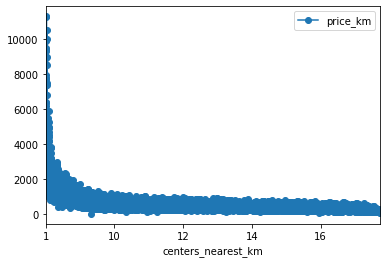

In [99]:
#Построим график зависимости цена от удалённости от центра (по срезу СПб)
(data_good_SPB
     .sort_values(by='centers_nearest_km',ascending=True)
     .plot(x='centers_nearest_km',y='price_km', style='o-')
)

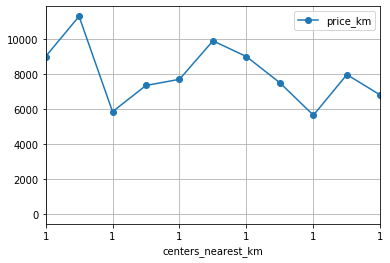

In [100]:
#Построим график зависимости цена от удалённости от центра (по срезу СПб)
(data_good_SPB
     .sort_values(by='centers_nearest_km',ascending=True)
     .plot(x='centers_nearest_km',y='price_km', style='o-', grid=True, xlim=[0,10])
)

При изучении более детального графика можно заметить, что при достижения отметки 8 км цена резко падает.
Примем, что центральная часть города лежит в радиусе 8 км.

### Cегмент квартир в центре

In [101]:
#Выделим квартиры, расположенные не далее 8 км от центра города
data_good_SPB = data_good_SPB.query('centers_nearest_km <= 8')
data_good_SPB.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,flat_on_the_last_floor,price_sq_m,week_day,month,year,floor_group,living_to_total,kitchen_to_total,floor_group_id,centers_nearest_km,price_km
24,8,6500.000000,97.200000,2015-10-31,2,2.650000,3,46.500000,1,False,False,...,False,66.870000,5,10,2015,Первый этаж,0.478000,0.202000,0,2,3250.000000
70,9,3400.000000,30.000000,2018-09-05,1,2.650000,5,16.000000,1,False,False,...,False,113.330000,2,9,2018,Первый этаж,0.533000,0.233000,0,8,425.000000
94,3,3500.000000,29.500000,2019-04-26,1,2.500000,5,15.600000,2,False,False,...,False,118.640000,4,4,2019,Другой этаж,0.529000,0.186000,2,7,500.000000
99,32,9600.000000,90.000000,2017-09-26,4,2.650000,5,67.000000,2,False,False,...,False,106.670000,1,9,2017,Другой этаж,0.744000,0.089000,2,3,3200.000000
111,4,4590.000000,40.000000,2017-05-29,1,2.650000,6,18.000000,1,False,False,...,False,114.750000,0,5,2017,Первый этаж,0.450000,0.250000,0,6,765.000000
138,8,4800.000000,40.000000,2017-11-18,2,2.650000,3,29.000000,2,False,False,...,False,120.000000,5,11,2017,Другой этаж,0.725000,0.150000,2,3,1600.000000
143,9,2990.000000,30.000000,2016-06-08,1,2.500000,9,20.000000,9,False,False,...,True,99.670000,2,6,2016,Последний этаж,0.667000,0.187000,1,6,498.330000
193,6,7920.000000,83.800000,2017-08-17,4,2.470000,9,55.900000,9,False,False,...,True,94.510000,3,8,2017,Последний этаж,0.667000,0.117000,1,8,990.000000
219,12,7700.000000,58.700000,2017-12-12,1,2.650000,7,17.000000,3,False,False,...,False,131.180000,1,12,2017,Другой этаж,0.290000,0.267000,2,5,1540.000000
305,12,6283.000000,70.800000,2017-10-05,3,2.650000,5,50.900000,5,False,False,...,True,88.740000,3,10,2017,Последний этаж,0.719000,0.116000,1,4,1570.750000


Проанализируем эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков.

#### Площадь квартир, расположенных в центре Санкт-Петербурга

In [102]:
data_good_SPB['total_area'].describe()

count   1286.000000
mean      58.649456
std       19.862200
min       12.000000
25%       43.400000
50%       56.950000
75%       72.000000
max      114.200000
Name: total_area, dtype: float64

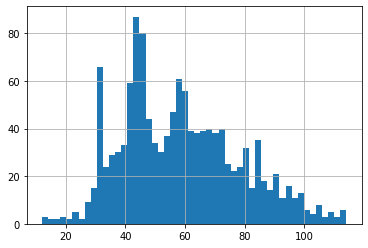

In [103]:
data_good_SPB['total_area'].hist(bins=50)

* В центральном районе города Санкт-Петербурга в среднем продаются квартиры площадью около 60 км.в.
* Минимальная площадь 12 кв.м.
* Максимальная площадь 114,2 кв.м.
* Гистограмма отражает нормальный вид распределения
* Большое количество квартир с площадью около 35 кв.м., 45 кв.м. и 80 кв.м. позволяют предположить, что это квартиры типовой застройки (студии, однокомнатные и трехкомнатные типовые квартиры) 

#### Стоимость квартир, расположенных в центре Санкт-Петербурга

In [104]:
data_good_SPB['last_price'].describe()

count    1286.000000
mean     6756.801012
std      2221.797841
min      1686.000000
25%      5000.000000
50%      6570.000000
75%      8437.500000
max     11879.250000
Name: last_price, dtype: float64

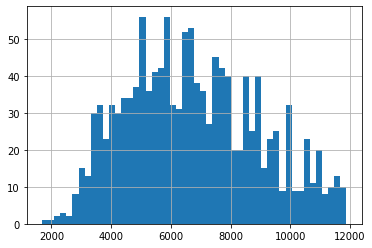

In [105]:
data_good_SPB['last_price'].hist(bins=50)

* В центральном районе города Санкт-Петербурга в среднем продаются квартиры стоимостью 7039 тыс. руб.
* Минимальная стоимость1686 тыс. руб.
* Максимальная стоимость 11879 тыс. руб.
* Гистограмма отражает нормальный вид распределения

#### Число комнат в квартирах, расположенных в центре Санкт-Петербурга

In [106]:
data_good_SPB['rooms'].describe()

count   1286.000000
mean       2.039658
std        0.886991
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: rooms, dtype: float64

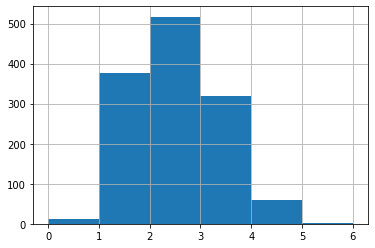

In [107]:
data_good_SPB['rooms'].hist(bins=6)

* В центральном районе города Санкт-Петербурга в среднем продаются двухкомнатные квартиры
* Минимальное количество комнат 0 (студии)
* Максимальное количество комнат 6.
* Гистограмма отражает нормальный вид распределения

#### Высота потолков в квартирах, расположенных в центре Санкт-Петербурга

In [108]:
data_good_SPB['ceiling_height'].describe()

count   1286.000000
mean       2.654238
std        0.075000
min        2.460000
25%        2.650000
50%        2.650000
75%        2.650000
max        2.850000
Name: ceiling_height, dtype: float64

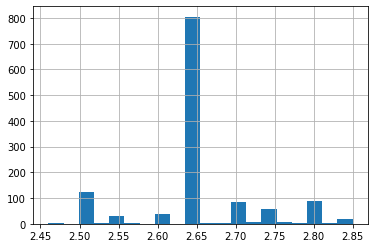

In [109]:
data_good_SPB['ceiling_height'].hist(bins=20)

* В центральном районе города Санкт-Петербурга в среднем продаются квартиры с высотой потолков равной 2,65м.
* Минимальная высота потолков составляет 2,46 м.
* Максимальная высота - 2,85 м
* Гистограмма отражает нормальный вид распределения

In [110]:
data_good_SPB[[
    'last_price', 'total_area', 'rooms', 'ceiling_height'
]].corr()

,last_price,total_area,rooms,ceiling_height
last_price,1.000000,0.728793,0.437216,0.233422
total_area,0.728793,1.000000,0.788182,0.152225
rooms,0.437216,0.788182,1.000000,0.010456
ceiling_height,0.233422,0.152225,0.010456,1.000000


На стоимость квартиры в центре Санкт-Петербурга большое влияние оказывает общая площадь (коэффициент корреляции 0,71), затем количество комнат (коэффициент корреляции 0,45, средняя теснота связи) и менее всего на стоимость влияет высота потолков (коэффициент корреляции 0,17, слабая теснота связи)

Рассмотрим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)

In [111]:
data_good_SPB[[
    'last_price', 'rooms', 'floor_group_id', 'city_centers_nearest', 'days_exposition'
]].corr()

,last_price,rooms,floor_group_id,city_centers_nearest,days_exposition
last_price,1.000000,0.437216,0.228982,-0.178704,0.103897
rooms,0.437216,1.000000,0.006072,-0.176469,0.057510
floor_group_id,0.228982,0.006072,1.000000,0.155927,0.000966
city_centers_nearest,-0.178704,-0.176469,0.155927,1.000000,-0.044984
days_exposition,0.103897,0.057510,0.000966,-0.044984,1.000000


Text(0.5, 1, 'Корреляция стоимости квартиры с различными параметрами')

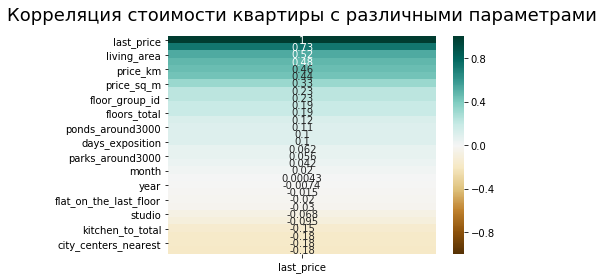

In [112]:
heatmap = sns.heatmap(data_good_SPB.corr()
                      [['last_price']].
                      sort_values
                      (
                          by='last_price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG'
                     )
(heatmap.set_title
 ('Корреляция стоимости квартиры с различными параметрами', fontdict={'fontsize':18}, pad=16
 ))

На стоимость квартиры в центре Санкт-Петербурга плактически не влияет этаж квартиры, удаленность от центра (что логично, все выделенные квартиры находятся близко к центру) и дата размещения объявления
Сильное и среднее влияние на показатель цены квартиры в центре СПб оказывают 5 показателей:
- жилая площадь,
- количество комнат,
- цена 1 кв.м.,
- высота потолков

Для лучшей визуализации построим графики по Санкт-Петребургу (синяя линия) и в целом по всей выборке (оранжевая линия) на одном поле. Рассмотри показатели число комнат, этаж, удалённость от центра, дата размещения объявления

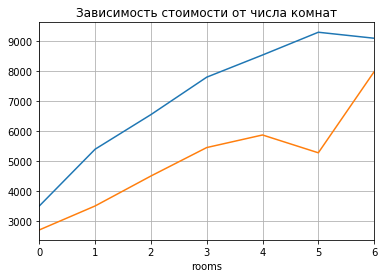

In [113]:
(data_good_SPB
     .sort_values(by='last_price',ascending=True)
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms', y='last_price', style='-', grid=True, 
           title='Зависимость стоимости от числа комнат')
)

(data_good
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms', y='last_price', style='-', grid=True)
)
plt.show()

* Стоимость квартир с одинаковым числом комнат в центре СПб, либо за пределами центра СПб, подчиняется практически одному закону.
* Только в центре СПб падение цены начинается с 5 комнат, а в целом по выборке с 4-х комнат, а затем опять начинает расти
* Разница в стоимости квартир в центре СПб и за его пределами около 2 млн. руб.

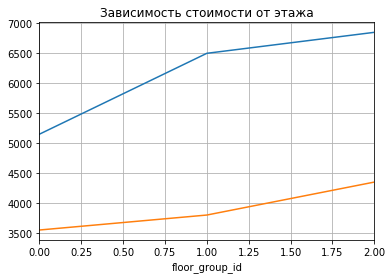

In [114]:
(data_good_SPB
     .sort_values(by='last_price',ascending=True)
     .groupby('floor_group_id')['last_price'].median()
     .plot(x='floor_group_id', y='last_price', style='-', grid=True, 
           title='Зависимость стоимости от этажа')
)

(data_good
     .groupby('floor_group_id')['last_price'].median()
     .plot(x='floor_group_id', y='last_price', style='-', grid=True)
)
plt.show()

* Дешевле всего квартиры на первом этаже, дороже всего, на любом этаже кроме первого и последнего.
* Разница в стоимости квартир в центре СПб и за его пределами опять же около 2 млн. руб. Квартиры в центре СПБ стоят дороже

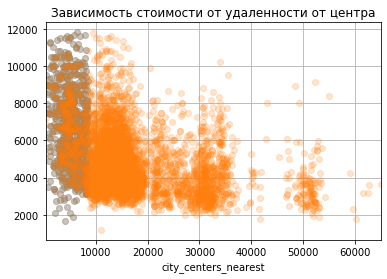

In [115]:
(data_good_SPB
     .sort_values(by='last_price',ascending=True)
     .groupby('city_centers_nearest')['last_price'].median()
     .plot(x='city_centers_nearest', y='last_price', style='o', grid=True, alpha=0.3, 
           title='Зависимость стоимости от удаленности от центра')
)

(data_good
     .groupby('city_centers_nearest')['last_price'].median()
     .plot(x='city_centers_nearest', y='last_price', style='o', grid=True, alpha=0.2)
)
plt.show()

* Как и следовало предположить, на гистограмме видно, что в случае расположения квартиры в центре Петербурга, она не может быть далее чем 8 км от центра города
* При этом в центре СПб стоимость квартиры может варьироваться от 2000 до 12000 тыс. руб.

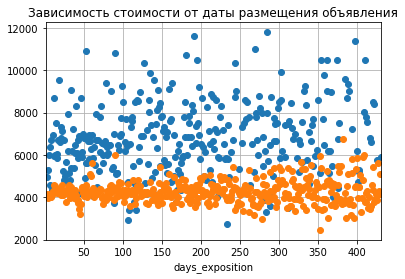

In [116]:
(data_good_SPB
     .sort_values(by='last_price',ascending=True)
     .groupby('days_exposition')['last_price'].median()
     .plot(x='days_exposition', y='last_price', style='o', grid=True, 
           title='Зависимость стоимости от даты размещения объявления')
)

(data_good
     .groupby('days_exposition')['last_price'].median()
     .plot(x='days_exposition', y='last_price', style='o', grid=True)
)
plt.show()

Строгой зависимости стоимости квартиры от даты размещения объявления не выявлено

Для квартир в центре Санкт-Петербурга в целом наблюдается такая же картина как и для всей выборки квартир
Помимо средней разности в цене около 2 млн. руб. (квартиры в центре стоят дороже), значимых изменений не выявлено

## Общий вывод

Посчитаем процент удаленных данных

In [142]:
(100 - data_good['rooms'].count()/data['rooms'].count() * 100).round(1)

26.5

* В проекте была исследовавана рыночная стоимость объектов недвижимости в городе Санкт-Петербурге и соседних населённых пунктах за несколько лет.
* После проведенного анализа представленных данных, были сформированы требования, которым должны соответствовать реальные объявления. Было удалено 26,5% данных. Некоторые пропуски данных были заменены на типовые значения, некоторые невозможно восстановить. Поэтому возникло два варианта, мы удалили данные о квартирах, с существенными пропусками ,которые влияют на наше исследование. И оставили информацию о  тех квартирах, пропуски в информации которых не задевают сферу нашего исследования.   
* Была выявлена зависимость стоимости квартиры от обшей площади квартиры, числа комнат и удаленности от центра.
* При этом если квартира в центре Санкт-Петербурга, то аналогичные зависимости соблюдаются только для общей площади и количества комнат. Удаленность от центра перестает играть роль, так как все квартиры и так находятся в центре.
* Увеличение стоимости квартир в центре Санкт-Петербурга и за его пределами в среднем составляет 2 млн. руб. в пользу центра
* Остались вопросы к product менеджеру, в частности, получение более подробной информации по элитному жилью (дорогому и поэтому выбивающемуся из общей картины по характеристикам)